### Sophie Johnson
### Research Computing Fall 2021
# Forest Fires: temperature, precipitation, and burning index

In [39]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
from pylab import rcParams
#rcParams['figure.figsize'] = 12,6
import cartopy.crs as ccrs
import cartopy
import pooch

## Number of Forest Fires and Acres Burned over time
National Interagency Fire Center: https://www.nifc.gov/sites/default/files/document-media/TotalFires.pdf

In [40]:
doi = "doi:10.5281/zenodo.5764953"
fname = "FireCounts.xlsx.csv"
file_path = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:52e8a53cbabd01f05fc919a2927b2675",
)
file_path

import pandas as pd
df = pd.read_csv('FireCounts.xlsx.csv', delimiter=',')
print(df.head(5))

   Year  Fires     Acres
0  2020  58950  10122336
1  2019  50477   4664364
2  2018  58083   8767492
3  2017  71499  10026086
4  2016  67743   5509995


In [41]:
#When were the 5 years with the largest number of fires?
df.nlargest(5,'Fires')

,Year,Fires,Acres
14,2006,96385,9873745
24,1996,96363,6065998
21,1999,92487,5626093
20,2000,92250,7393493
28,1992,87394,2069929


In [42]:
#In contrast, when were the 5 years with the largest number of acres burned from fires?
df.nlargest(5,'Acres')

,Year,Fires,Acres
5,2015,68151,10125149
0,2020,58950,10122336
3,2017,71499,10026086
14,2006,96385,9873745
13,2007,85705,9328045


2015 was the first year on record that >10 million acres were burned: https://www.climatecentral.org/news/2015-wildfire-season-sets-ominous-record-19879
- "There were two common factors behind all these fires: they occurred in places that had a dry winter and warm temperatures during wildfire season."

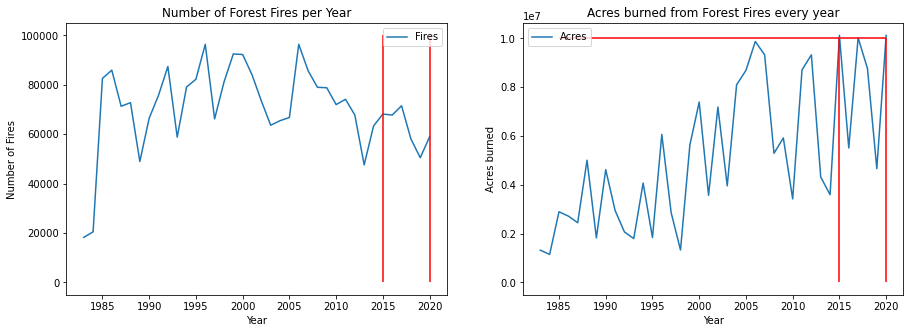

In [43]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

df.plot(x='Year',y='Fires', ax=ax0)
ax0.set_title('Number of Forest Fires per Year')
ax0.set_xlabel('Year')
ax0.set_ylabel('Number of Fires')
ax0.vlines(2015, 0, 100000, color='red')
ax0.vlines(2020, 0, 100000, color='red')

df.plot(x='Year',y='Acres', ax=ax1)
ax1.set_title('Acres burned from Forest Fires every year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Acres burned')
ax1.hlines(1e7, 1985, 2020, color='red')
ax1.vlines(2015, 0, 1e7, color='red')
ax1.vlines(2020, 0, 1e7, color='red')


## Fire and Fuel Emissions from Fires
Data is produced using CASA-GFED3 Model with MERRA-2 meteorology, burned area derived from MODIS Collection 6, and NDVI derived from AVHRR (GIMMSv1). Units are kg Carbon m-2 day-1. Years are from 2003-2017.

1. FIRE = wildfire emission flux to the atmosphere
2. FUEL = fuel wood emission flux to the atmosphere

*Must install lxml first*: pip install lxml

In [44]:
import pip
! pip install lxml

In [45]:
from pydap.client import open_url
from pydap.cas.urs import setup_session

username = "skjohn" # replace with your EarthData username
password = "Ch@rlie01"  # replace with your EarthData password

url = "https://acdisc.gesdisc.eosdis.nasa.gov/opendap/hyrax/CMS/GEOS_CASAGFED_D_FIRE.3/GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2003.nc"

session = setup_session(username, password, check_url=url)
pydap_ds = open_url(url, session=session)
store = xr.backends.PydapDataStore(pydap_ds)
fire_daily_2003 = xr.open_dataset(store)

#### 2014 fire/fuel data

In [46]:
username = "skjohn" # replace with your EarthData username
password = "Ch@rlie01"  # replace with your EarthData password

url = "https://acdisc.gesdisc.eosdis.nasa.gov/opendap/hyrax/CMS/GEOS_CASAGFED_D_FIRE.3/GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2014.nc"

session = setup_session(username, password, check_url=url)
pydap_ds = open_url(url, session=session)
store = xr.backends.PydapDataStore(pydap_ds)
fire_daily_2014 = xr.open_dataset(store)

#### 2015 fire/fuel data

In [47]:
username = "skjohn" # replace with your EarthData username
password = "Ch@rlie01"  # replace with your EarthData password

url = "https://acdisc.gesdisc.eosdis.nasa.gov/opendap/hyrax/CMS/GEOS_CASAGFED_D_FIRE.3/GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2015.nc"

session = setup_session(username, password, check_url=url)
pydap_ds = open_url(url, session=session)
store = xr.backends.PydapDataStore(pydap_ds)
fire_daily_2015 = xr.open_dataset(store)

#### 2016 fire/fuel data

In [48]:
username = "skjohn" # replace with your EarthData username
password = "Ch@rlie01"  # replace with your EarthData password

url = "https://acdisc.gesdisc.eosdis.nasa.gov/opendap/hyrax/CMS/GEOS_CASAGFED_D_FIRE.3/GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2016.nc"

session = setup_session(username, password, check_url=url)
pydap_ds = open_url(url, session=session)
store = xr.backends.PydapDataStore(pydap_ds)
fire_daily_2016 = xr.open_dataset(store)

In [49]:
#fire_daily_2003 = xr.open_dataset('GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2003.nc') 
#fire_daily_2014 = xr.open_dataset('GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2014.nc') 
#fire_daily_2016 = xr.open_dataset('GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2016.nc') 
fire_daily_2015 = xr.open_dataset('GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2015.nc') 
fire_daily_2015

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 360, time: 365, bounds: 2)
Coordinates:
  * longitude  (longitude) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2015-12-31T12:00:00
Dimensions without coordinates: bounds
Data variables:
    FIRE       (time, latitude, longitude) float32 ...
    FUEL       (time, latitude, longitude) float32 ...
    time_bds   (time, bounds) datetime64[ns] ...
Attributes: (12/24)
    Conventions:                    CF-1.7
    title:                          2015 GEOS-Carb CASA-GFED3 Daily Fire Emis...
    source:                         CASA-GFED3 Model using MERRA-2 meteorology
    contact:                        Lesley Ott Lesley.Ott@nasa.gov
    history:                        Files written by IDL
    institution:                    NASA Global Modeling and Assimilation Office
    ...                             ...
    ProductionDateTime:             Mon Jul 29 15:04:56 2019
    NorthernmostLatiude:            90.0
    WesternmostLongitude:           -180.0
    SouthernmostLatitude:           -90.0
    EasternmostLongitude:           180.0
    ProcessingLevel:                4

Text(0.5, 1.0, '2003 Time Mean of Fuel Emissions')

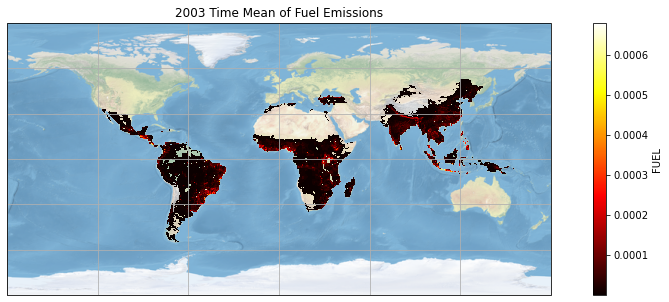

In [50]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())

#fire_daily_2003.FUEL.mean('time').plot(ax=ax,cmap='YlOrRd',transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN, edgecolor='black')
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines()
ax.stock_img()
#fire_daily_2003.FUEL[1].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='Reds')

ff=fire_daily_2003.FUEL.mean('time')
ffpos = ff.where(ff > 0)
ffpos.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.set_title('2003 Time Mean of Fuel Emissions')

### Let's see if it changes to 2016

Text(0.5, 1.0, '2003-2016 Difference in Time Mean of Fuel Emissions')

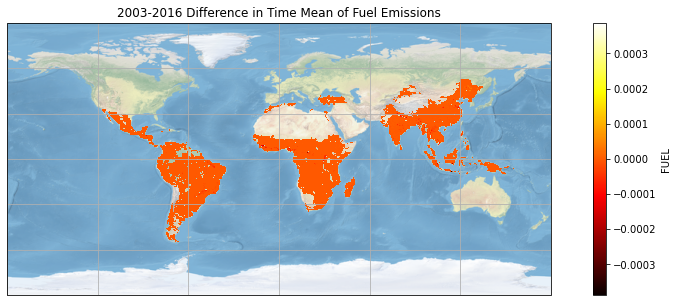

In [51]:
ff16=fire_daily_2016.FUEL.mean('time')
ff16pos = ff16.where(ff16 > 0)

plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN, edgecolor='black')
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines()
ax.stock_img()

firediff = ff16pos - ffpos
firediff.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.set_title('2003-2016 Difference in Time Mean of Fuel Emissions')

There doesn't appear to be much difference in fuel emissions.

### Let's compare to FIRE emissions.

Text(0.5, 1.0, '2003 Time Mean of Fire Emissions')

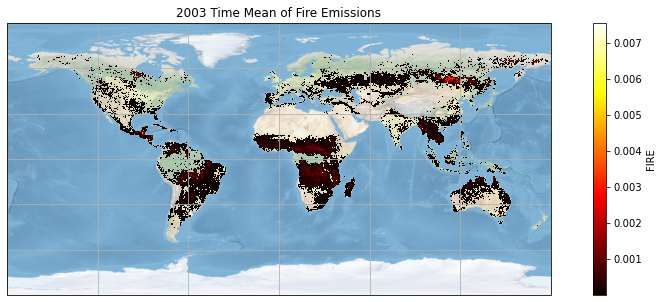

In [52]:
plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN, edgecolor='black')
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines()
ax.stock_img()

fire03=fire_daily_2003.FIRE.mean('time')
fire03pos = fire03.where(fire03 > 0)
fire03pos.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.set_title('2003 Time Mean of Fire Emissions')

### What's the difference in fire emissions from 2003 to 2016?

Text(0.5, 1.0, '2003-2016 Difference in Time Mean of Fire Emissions')

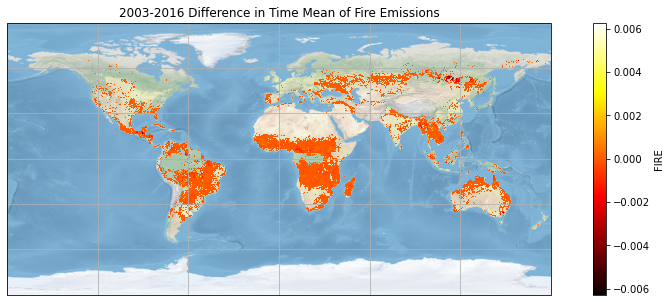

In [53]:
fire16=fire_daily_2016.FIRE.mean('time')
fire16pos = fire16.where(fire16 > 0)

plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN, edgecolor='black')
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines()
ax.stock_img()

firediff = fire16pos - fire03pos
firediff.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.set_title('2003-2016 Difference in Time Mean of Fire Emissions')

There doesn't appear to be much of a difference in fire emissions either.

## Temperature and Precipitation
Data is from NOAA.

In [54]:
#tmax = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cpc_global_temp/tmax.day.1991-2020.ltm.nc')
tmax_2003 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cpc_global_temp/tmax.2003.nc')
tmax_2014 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cpc_global_temp/tmax.2014.nc')
tmax_2015 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cpc_global_temp/tmax.2015.nc')
#tmax_2015

Text(0.5, 1.0, 'Time mean of Maximum Temperature 2015')

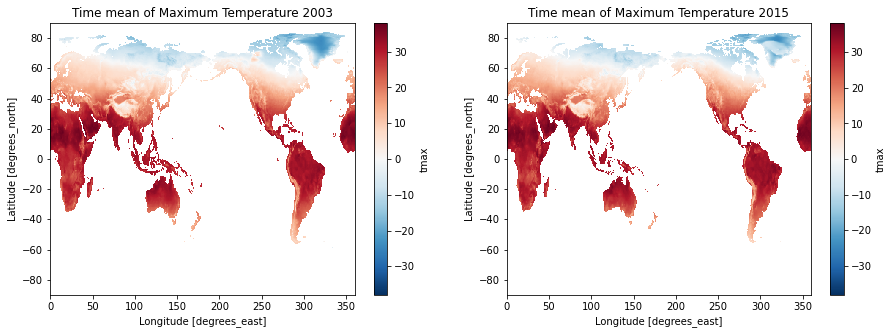

In [55]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

tmax_2003.tmax.mean('time').plot(ax=ax0)
ax0.set_title('Time mean of Maximum Temperature 2003')

tmax_2015.tmax.mean('time').plot(ax=ax1)
ax1.set_title('Time mean of Maximum Temperature 2015')

In [56]:
#precip = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.day.1991-2020.ltm.nc')
precip_2003 = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.2003.nc')
precip_2015 = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.2015.nc')
precip_2014 = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.2014.nc')

Text(0.5, 1.0, 'Time mean of 2015 precipitation')

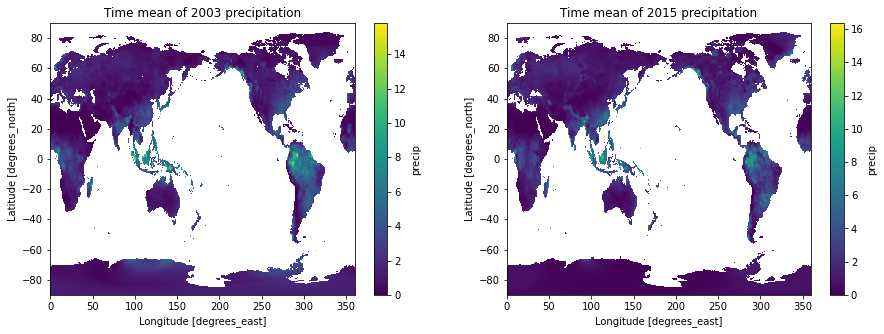

In [57]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

precip_2003.precip.mean('time').plot(ax=ax0)
ax0.set_title('Time mean of 2003 precipitation')

precip_2015.precip.mean('time').plot(ax=ax1)
ax1.set_title('Time mean of 2015 precipitation')


Comparing 2003 to 2015 above, it can roughly be seen that temperature maximums look relatively consistent while precipitation has increased.

### Case Study: The Okanogan Complex Fire 
- Location: north-central Washington state (roughly lon = -119 and lat = 48). 
- Composed of 5 fires caused by lightning strikes on August 15, 2015, with two of the fires near Conconully merging days later on August 19.

Text(0.5, 1.0, 'Max Temperature near Okanogan County in 2015')

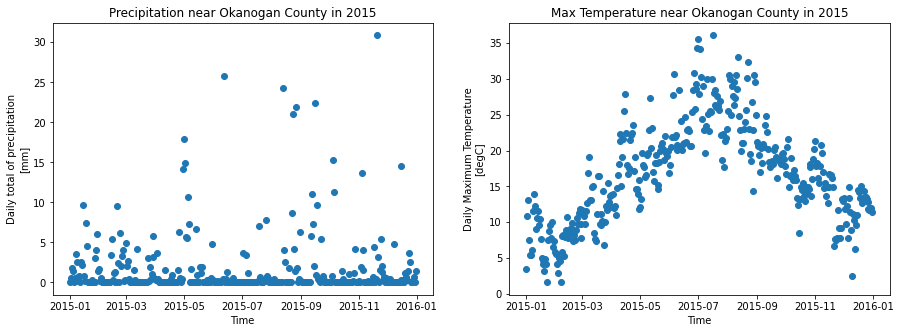

In [58]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

precip_2015.sel(lon=-119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='precip',ax=ax0)
ax0.set_title('Precipitation near Okanogan County in 2015')

tmax_2015.sel(lon=-119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='tmax',ax=ax1)
ax1.set_title('Max Temperature near Okanogan County in 2015')

### What did temperature and precipitation look like the year before?

Text(0.5, 1.0, 'Max Temperature near Okanogan County in 2014')

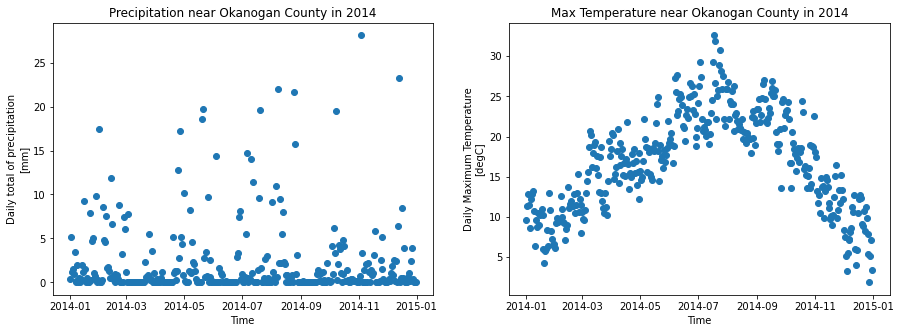

In [59]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

precip_2014.sel(lon=-119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='precip',ax=ax0)
ax0.set_title('Precipitation near Okanogan County in 2014')

tmax_2014.sel(lon=-119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='tmax',ax=ax1)
ax1.set_title('Max Temperature near Okanogan County in 2014')

### What did 2003 look like compared to 2015?

Text(0.5, 1.0, 'Precipitation near Okanogan County in 2015')

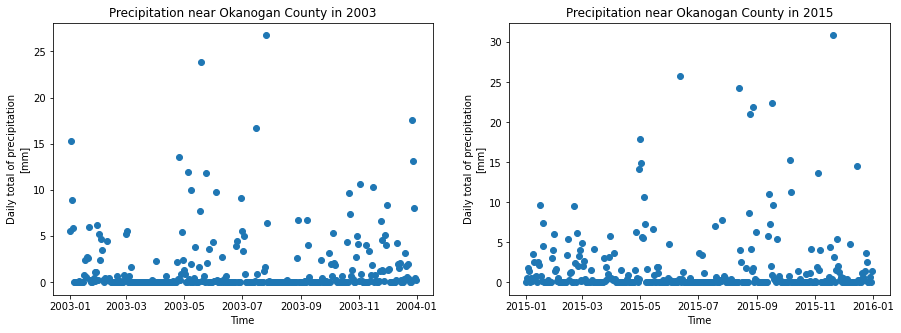

In [60]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

precip_2003.sel(lon=-119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='precip',ax=ax0)
ax0.set_title('Precipitation near Okanogan County in 2003')

precip_2015.sel(lon=-119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='precip',ax=ax1)
ax1.set_title('Precipitation near Okanogan County in 2015')

Interestingly, precipitation has a higher scale in 2003. However, the distributions are different.

Text(0.5, 1.0, 'Max Temperature near Okanogan County in 2015')

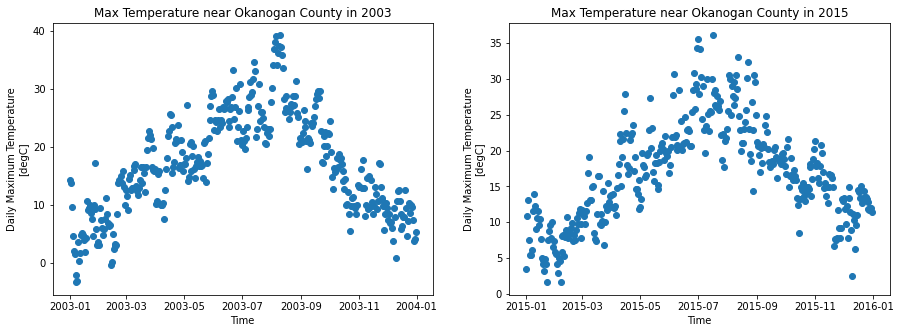

In [61]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

tmax_2003.sel(lon=-119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='tmax',ax=ax0)
ax0.set_title('Max Temperature near Okanogan County in 2003')

tmax_2015.sel(lon=-119.0, lat=48.0, method='nearest').plot.scatter(x='time',y='tmax',ax=ax1)
ax1.set_title('Max Temperature near Okanogan County in 2015')

Interestingly, temperature was higher in 2003 than 2015.

### What were the fuel emissions in 2015?

Text(0.5, 1.0, 'Fire Emissions near Okanogan County, WA in 2015')

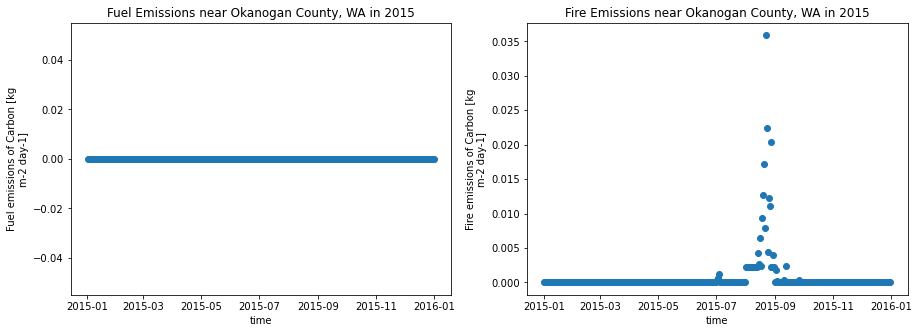

In [62]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

fire_daily_2015.sel(longitude=-119.0, latitude=48.0, method='nearest').plot.scatter(x='time',y='FUEL',ax=ax0)
ax0.set_title('Fuel Emissions near Okanogan County, WA in 2015')

fire_daily_2015.sel(longitude=-119.0, latitude=48.0, method='nearest').plot.scatter(x='time',y='FIRE',ax=ax1)
ax1.set_title('Fire Emissions near Okanogan County, WA in 2015')

Fire emissions in August 2015 pick up the Okanogan Fire Complex, but not the fuel emissions.

Text(0.5, 1.0, 'Fire Emissions near Okanogan County, WA in 2015')

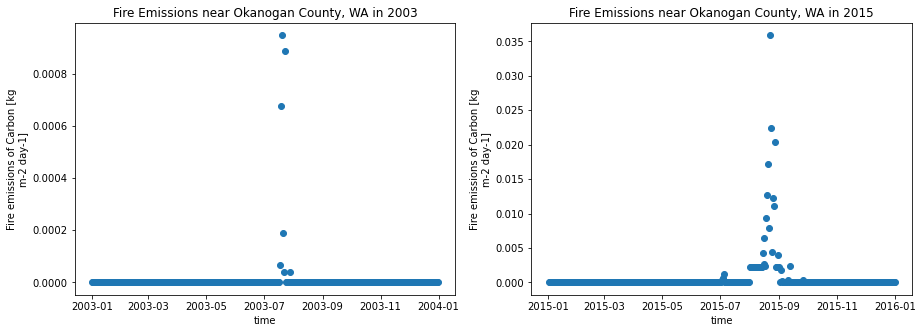

In [63]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

fire_daily_2003.sel(longitude=-119.0, latitude=48.0, method='nearest').plot.scatter(x='time',y='FIRE',ax=ax0)
ax0.set_title('Fire Emissions near Okanogan County, WA in 2003')

fire_daily_2015.sel(longitude=-119.0, latitude=48.0, method='nearest').plot.scatter(x='time',y='FIRE',ax=ax1)
ax1.set_title('Fire Emissions near Okanogan County, WA in 2015')

Fire emissions of carbon in the 2015 fire season are higher than in 2003.

Text(0.5, 1.0, '2015 Time Mean of Fuel Emissions')

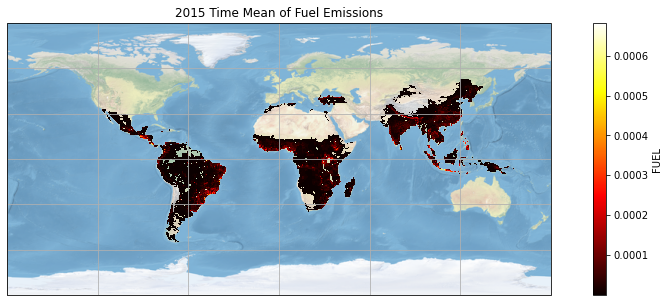

In [64]:
plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN, edgecolor='black')
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines()
ax.stock_img()

ff15=fire_daily_2015.FUEL.mean('time')
ff15pos = ff15.where(ff15 > 0)
ff15pos.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.set_title('2015 Time Mean of Fuel Emissions')

Interestingly, fuel emissions do not show up in the Okanogan region of Washington state in the US.

## Anomalies and Correlations
### Temperature - what's the global correlation with temperature in Okanogan?

In [65]:
def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

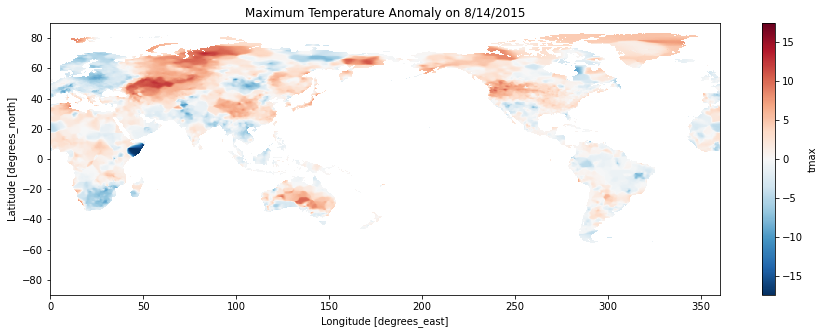

In [94]:
tmax_clim_03 = tmax_2003.tmax.groupby('time.month').mean(dim='time')
tmax_anom_03 = tmax_2003.tmax.groupby('time.month') - tmax_clim_03

tmax_clim_15 = tmax_2015.tmax.groupby('time.month').mean(dim='time')
tmax_anom_15 = tmax_2015.tmax.groupby('time.month') - tmax_clim_15

#%matplotlib inline
tmax_anom_15.sel(time='2015-08-01T00:00:00.000000000',method='nearest').plot(figsize=(15,5))
plt.title('Maximum Temperature Anomaly on 8/14/2015')

#2015 Tmax anomaly near Okanogan County, WA
tmax_ref_15 = tmax_anom_15.sel(lon=-119.0, lat=48.0, method='nearest')
tmax_ref_03 = tmax_anom_03.sel(lon=-119.0, lat=48.0, method='nearest')


The  maximum temperature anomaly in the days before the Okanogan Complex Fire was quite high, as can be seen in the Pacific Northwest region of the US.

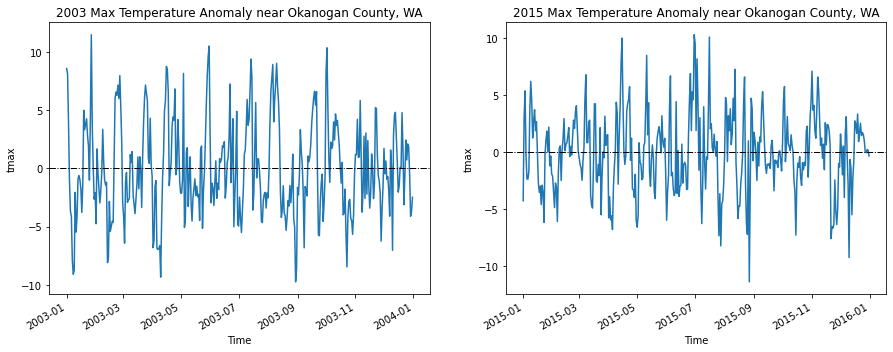

In [67]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

tmax_ref_03.plot(ax=ax0)
ax0.set_title('2003 Max Temperature Anomaly near Okanogan County, WA')
ax0.axhline(y=0, c='black', linewidth=1, linestyle='dashdot')

tmax_ref_15.plot(ax=ax1)
ax1.set_title('2015 Max Temperature Anomaly near Okanogan County, WA')
ax1.axhline(y=0, c='black', linewidth=1, linestyle='dashdot')

From the temperature anomaly graphs, you can roughly see that around August of each year, the maximum temperature has a strong positive anomaly, though it fluctuates quite a lot.

### Precipitation

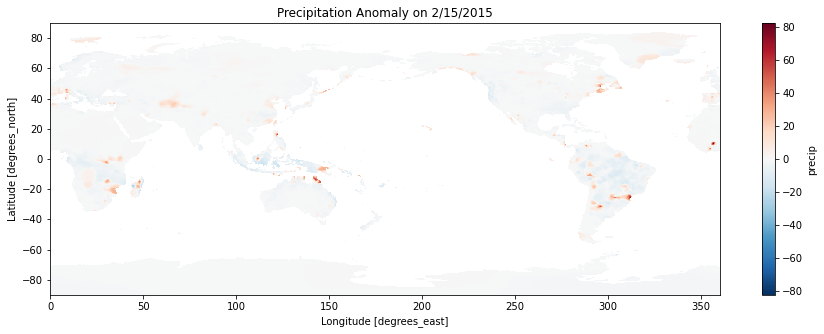

In [102]:
precip_clim_03 = precip_2003.precip.groupby('time.month').mean(dim='time')
precip_anom_03 = precip_2003.precip.groupby('time.month') - precip_clim_03

precip_clim_15 = precip_2015.precip.groupby('time.month').mean(dim='time')
precip_anom_15 = precip_2015.precip.groupby('time.month') - precip_clim_15

#%matplotlib inline
precip_anom_15.sel(time='2015-02-15T00:00:00.000000000',method='nearest').plot(figsize=(15,5))
plt.title('Precipitation Anomaly on 2/15/2015')

#2015 precip anomaly near Okanogan County, WA
precip_ref_15 = precip_anom_15.sel(lon=-119.0, lat=48.0, method='nearest')
precip_ref_03 = precip_anom_03.sel(lon=-119.0, lat=48.0, method='nearest')


While it is faint, there is a slight negative precipitation anomaly on the west coast of the US in the winter before the Okanogan Complex Fire.

Text(0.5, 1.0, '2015 Precipitation Anomaly near Okanogan County, WA')

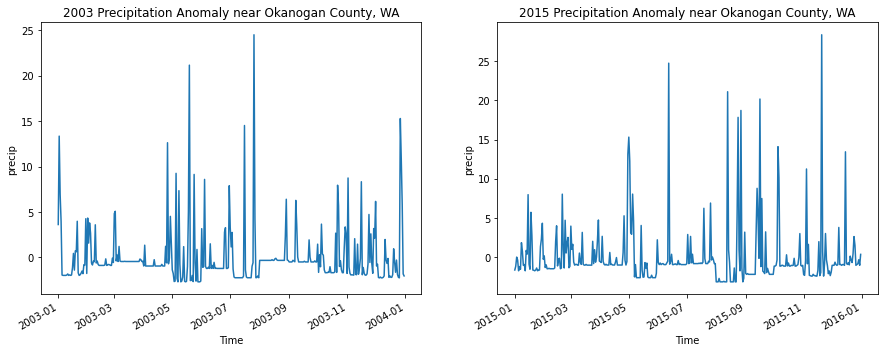

In [69]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax0,ax1 = ax

precip_ref_03.plot(ax=ax0)
ax0.set_title('2003 Precipitation Anomaly near Okanogan County, WA')

precip_ref_15.plot(ax=ax1)
ax1.set_title('2015 Precipitation Anomaly near Okanogan County, WA')

From the precipitation anomaly graphs, you can roughly see that precipitation anomalies are much smaller in 2015 during the wintertime. Low precipitation during the winter creates optimal forest fire conditions for the following summer. This is when the Okanogan Fire Complex occurred.

Text(0.5, 1.0, 'Correlation btw global Tmax Anomaly and Tmax anomaly near Okanogan County, WA in 2015')

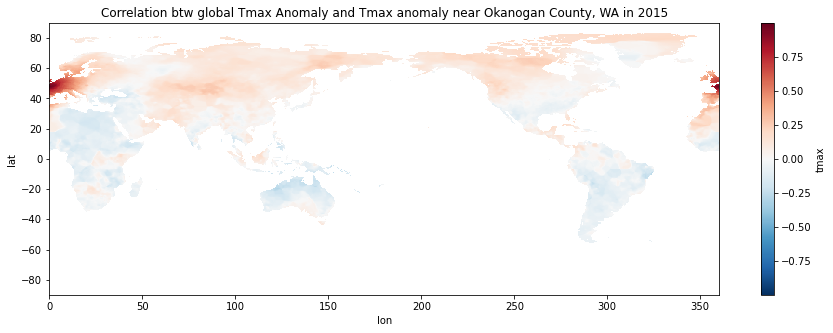

In [103]:
#2015 Tmax correlation
tmax_cor_15 = correlation(tmax_anom_15, tmax_ref_15, dims='time')
pc = tmax_cor_15.plot(figsize=(15,5))
pc.axes.set_title('Correlation btw global Tmax Anomaly and Tmax anomaly near Okanogan County, WA in 2015')

Text(0.5, 1.0, 'Correlation btw global Tmax Anomaly and Tmax anomaly near Okanogan County, WA in 2003')

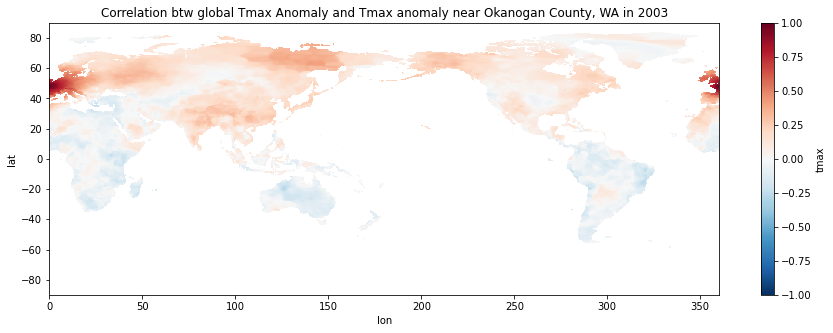

In [104]:
#2003 Tmax correlation
tmax_cor_03 = correlation(tmax_anom_03, tmax_ref_03, dims='time')
pc = tmax_cor_03.plot(figsize=(15,5))
pc.axes.set_title('Correlation btw global Tmax Anomaly and Tmax anomaly near Okanogan County, WA in 2003')

The correlation shifts from negative to positive in the Okanogan region from 2003 to 2015.

#### Higher Tmax correlations with the Okanogan region in 2015 can roughly be seen above.

Text(0.5, 1.0, 'Correlation btw global Precipitation Anomaly and Precipitation anomaly near Okanogan County, WA in 2015')

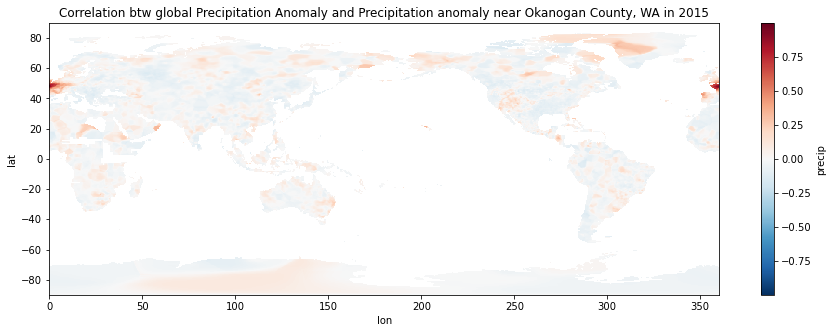

In [105]:
#2015 precip correlation
precip_cor_15 = correlation(precip_anom_15, precip_ref_15, dims='time')
pc2 = precip_cor_15.plot(figsize=(15,5))
pc2.axes.set_title('Correlation btw global Precipitation Anomaly and Precipitation anomaly near Okanogan County, WA in 2015')

Text(0.5, 1.0, 'Correlation btw global Precipitation Anomaly and Precipitation anomaly near Okanogan County, WA in 2003')

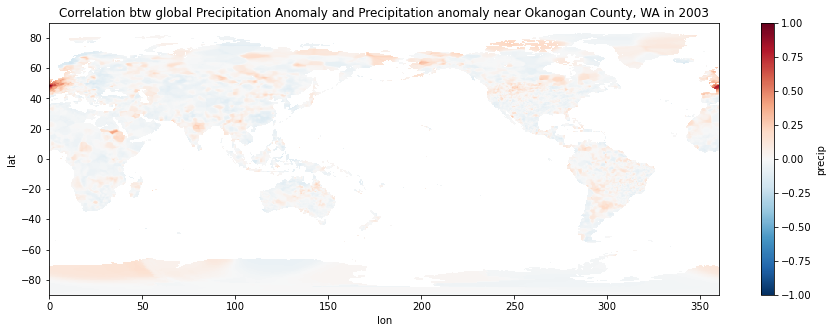

In [106]:
#2003 precip correlation
precip_cor_03 = correlation(precip_anom_03, precip_ref_03, dims='time')
pc2 = precip_cor_03.plot(figsize=(15,5))
pc2.axes.set_title('Correlation btw global Precipitation Anomaly and Precipitation anomaly near Okanogan County, WA in 2003')

It's a bit more difficult to assess the correlations of precipitation because it is very faint, but you can roughly see a negative correlation in the PNW region in 2015.

## Let's analyze a different type of forest fire measurement - Burning Index
### Copernicus Burnind Index fire data

Burning Index (dimensionless): "The Burning Index measures the difficulty of controlling a fire. It is derived from a combination of Spread component (how fast it will spread) and Energy release component (how much energy will be produced). In this way, it is related to flame length, which, in the Fire Behavior Prediction System, is based on rate of spread and heat per unit area. However, because of differences in the calculations for Burning index and flame length, they are not the same."

In [74]:
doi = "doi:10.5281/zenodo.5754302"
fname = "dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip"
file_path = pooch.retrieve(
    url=f"{doi}/{fname}",
    processor=pooch.Unzip(),
    known_hash="md5:da758492fad4f0e6edba48b6fb32663f",
)
#file_path

In [75]:
string1 = "20150815"
for file in file_path:
    if string1 in file:
        print(file)
        break
file

/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20150815_1200_hr_v3.0_con.nc


'/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20150815_1200_hr_v3.0_con.nc'

In [76]:
aug15 = xr.open_dataset(file)
aug15

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 2015-08-15
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    bi         (time, latitude, longitude) float64 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.5 (http://mpimet.mp...
    history:           Fri Sep 27 22:41:10 2019: cdo -z zip_1 -remapbil,gridd...
    Conventions:       CF-1.6
    Reference date:    20150815
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    NCO:               netCDF Operators version 4.7.8 (Homepage = http://nco....
    CDO:               Climate Data Operators version 1.9.5 (http://mpimet.mp...

In [77]:
string2 = "20150819"
for file2 in file_path:
    if string2 in file2:
        print(file2)
        break
file2
aug19 = xr.open_dataset(file2)
#aug19

/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20150819_1200_hr_v3.0_con.nc


In [78]:
string3 = "20140815"
for file3 in file_path:
    if string3 in file3:
        print(file3)
        break
    
file3
aug152014 = xr.open_dataset(file3)

/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20140815_1200_hr_v3.0_con.nc


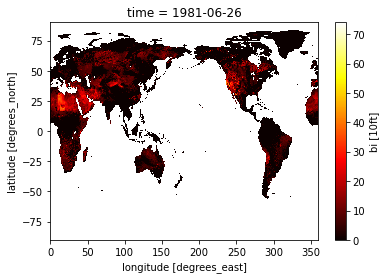

In [79]:
#Initial look at output
cpfd = xr.open_dataset(file_path[3333])
cpfd.bi.plot(cmap='hot')

Text(0.5, 1.0, 'BI the day of the Okanogan Fire Complex merge (8/19/15)')

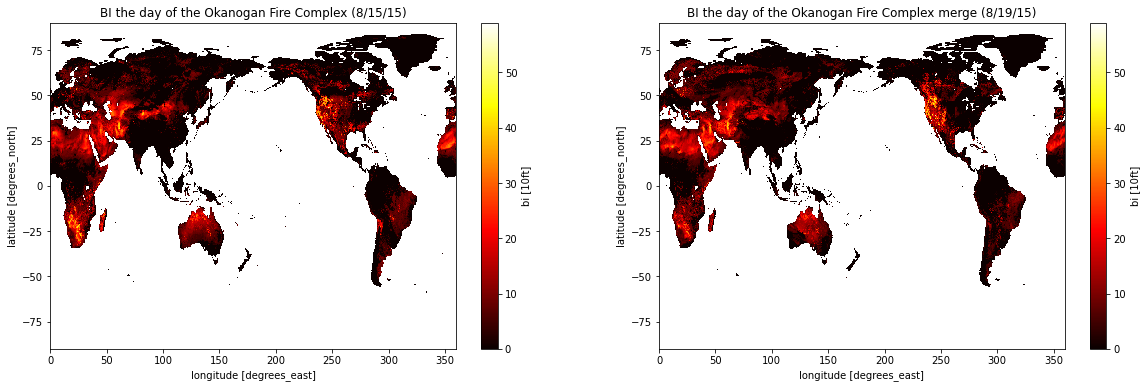

In [80]:
#cpfd_occ = xr.open_dataset('/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20150815_1200_hr_v3.0_con.nc')
#cpfd_occ_1 = xr.open_dataset('/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20150819_1200_hr_v3.0_con.nc')

fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

aug15.bi.plot(ax=ax0,cmap='hot')
ax0.set_title('BI the day of the Okanogan Fire Complex (8/15/15)')

aug19.bi.plot(ax=ax1,cmap='hot')
ax1.set_title('BI the day of the Okanogan Fire Complex merge (8/19/15)')


The US appears to have a higher BI the day the Okanogan fires merged.

### What did the previous year look like?

Text(0.5, 1.0, 'Burning Index near Okanogan County, WA in 2015')

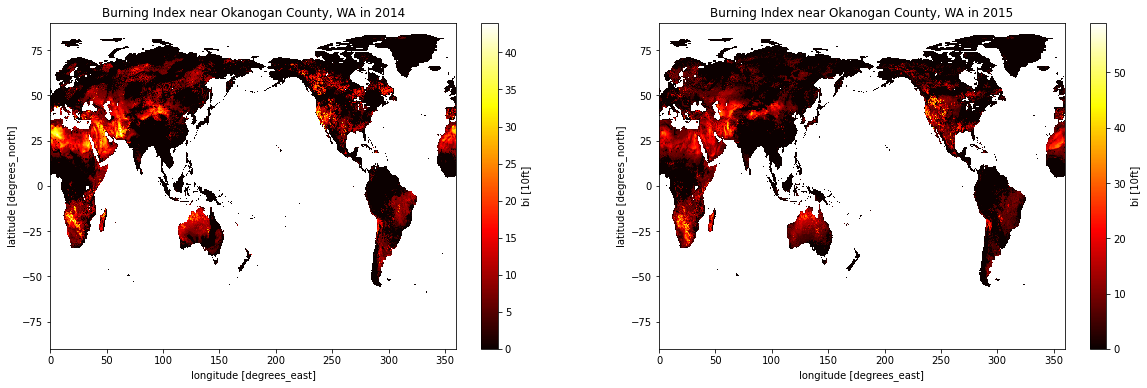

In [81]:
cpfd_occ_prev = xr.open_dataset('/home/jovyan/.cache/pooch/38037824d62871d96b8e7d318dfa0213-dataset-cems-fire-historical-5168ead2-a4ac-464f-9dfa-81fd61890413.zip.unzip/ECMWF_NFDRS_BI_20140815_1200_hr_v3.0_con.nc')

fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax0,ax1 = ax

#year before okanogan complex fire
aug152014.bi.plot(ax=ax0,cmap='hot')
ax0.set_title('Burning Index near Okanogan County, WA in 2014')

#year of okanogan complex fire
aug15.bi.plot(ax=ax1,cmap='hot')
ax1.set_title('Burning Index near Okanogan County, WA in 2015')

The same increase in BI in the US can be seen from 2014 to 2015.

Text(0.5, 1.0, 'Burning Index over the US on August 15th, 2015 (Day of Okanogan Fire Complex)')

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/crs.py

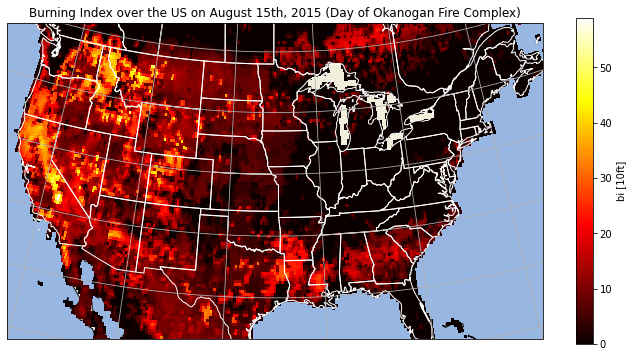

In [82]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

aug15.bi.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.STATES, edgecolor='white')
ax.gridlines()
ax.set_title('Burning Index over the US on August 15th, 2015 (Day of Okanogan Fire Complex)')

Text(0.5, 1.0, 'Burning Index in Washington state on August 15th, 2015 (Day of Okanogan Fire Complex)')

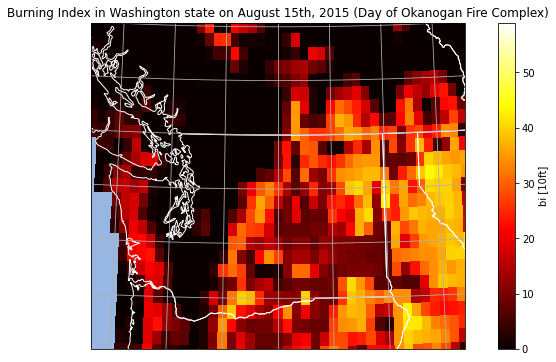

In [83]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 47.5
central_lon = -120
extent = [-125, -115, 45, 51]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

aug15.bi.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.STATES, edgecolor='white')
ax.gridlines()
ax.set_title('Burning Index in Washington state on August 15th, 2015 (Day of Okanogan Fire Complex)')

Zoom in on Washington state --> the Okanogan region is in Eastern Washington, where high BI can be seen above. 

Text(0.5, 1.0, 'Burning Index over the US on August 19th, 2015 (Day fires merging)')

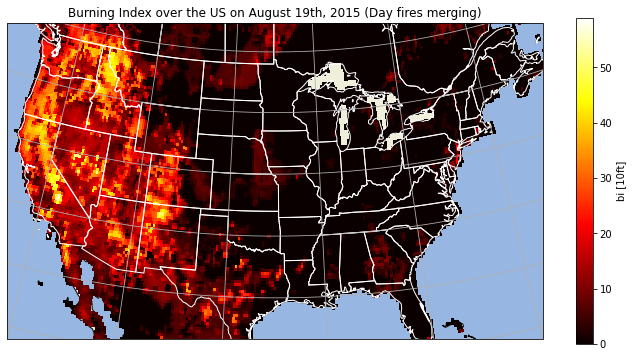

In [84]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

aug19.bi.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.STATES, edgecolor='white')
ax.gridlines()
ax.set_title('Burning Index over the US on August 19th, 2015 (Day fires merging)')

The above graph shows the day the fires merged in Okanogan. Below, we will see what this region looked like the year prior.

Text(0.5, 1.0, 'Burning Index over the US on August 15th, 2014 (Year before Okanogan Fire Complex)')

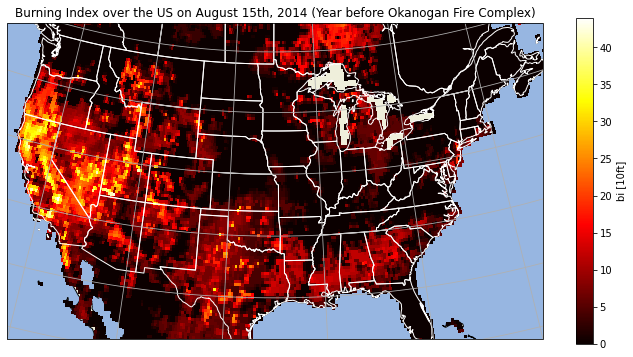

In [85]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

aug152014.bi.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='hot')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.STATES, edgecolor='white')
ax.gridlines()
ax.set_title('Burning Index over the US on August 15th, 2014 (Year before Okanogan Fire Complex)')

The year before the Okanogan fire complex, the burning index scale only goes up to 40, compared to 50 in 2015. Additionally, the burning index is close to 0 in Washington state, whereas it is much higher in 2015. Let's visualize the burning index, precipitation and temperature for 2015 below:

Text(0.5, 1.0, 'Time mean of Maximum Temperature 2015')

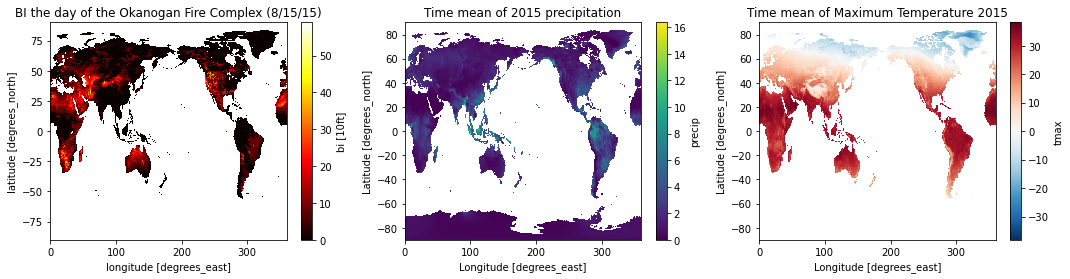

In [86]:
fig, ax = plt.subplots(ncols=3,figsize=(18,4))
ax0,ax1,ax2 = ax

aug15.bi.plot(ax=ax0,cmap='hot')
ax0.set_title('BI the day of the Okanogan Fire Complex (8/15/15)')

precip_2015.precip.mean('time').plot(ax=ax1)
ax1.set_title('Time mean of 2015 precipitation')

tmax_2015.tmax.mean('time').plot(ax=ax2)
ax2.set_title('Time mean of Maximum Temperature 2015')

In 2015, the Okanogan region of the US had a high Burning Index (yellow), low precipitation (dark blue), and a high maximum temperature (red).

## Future work?

New Copernicus data found that this years Siberian wildfires nearly doubled the emissions from last year, where a record amount of carbon dioxide was emitted.